In [198]:
import numpy as np
import cv2
import math
import PIL
from PIL import Image
from matplotlib import pyplot as plt

# Loading Images and Creating its histogram 

In [199]:
image = Image.open('hist2.tif').convert('RGB')
image.save('hist2.png')
image = cv2.imread('hist2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

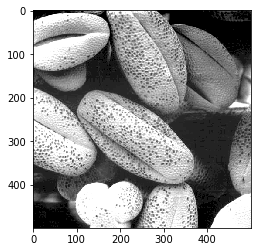

In [200]:
plt.imshow(gray,'gray')
plt.show()

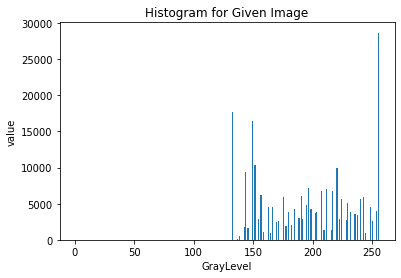

In [201]:

plt.hist(gray.ravel(),256,[0,256])
plt.title("Histogram for Given Image")
plt.xlabel("GrayLevel")
plt.ylabel("value")
plt.show()

# Histogram Equalization

In [202]:

grayArray = np.array(gray)

numPixels = [0] * 256
flat = grayArray.flatten()

In [203]:

for i in range(len(grayArray)):
    for j in range(len(grayArray[0])):
        intensity = grayArray[i][j]
        numPixels[intensity] += 1
print(numPixels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17718, 0, 0, 0, 96, 0, 506, 0, 0, 0, 1750, 9441, 0, 1642, 0, 0, 0, 16457, 0, 10381, 0, 0, 2945, 0, 6149, 0, 1038, 0, 0, 0, 4566, 0, 961, 0, 4562, 0, 0, 2446, 0, 2641, 0, 0, 0, 5860, 0, 1861, 0, 3850, 0, 0, 2016, 0, 4290, 0, 0, 0, 3081, 0, 6031, 2830, 0, 0, 4868, 0, 7185, 0, 4197, 0, 0, 0, 3696, 3911, 0, 0, 0, 6814, 0, 1379, 0, 7094, 0, 0, 0, 1295, 6812, 0, 0, 0, 9944, 0, 2898, 0, 5615, 0, 0, 0, 2791, 5118, 0, 3819, 0, 0, 0, 3533, 0, 3482, 0, 0, 5679, 0, 5933, 0, 1008, 0, 0, 0, 4599, 0, 2546, 0, 0, 4007, 0, 28659]


In [204]:
def calProb(pixels):
    width, height = gray.shape
    mn= width*height
    probability = []
    for i in range(len(pixels)):
        value = pixels[i]/ mn
        probability.append(value)
    return (probability)

            

In [205]:
result = calProb(numPixels)


In [206]:
def calCDF(prob):
    cdf = []
    for i in range(len(prob)):
        cdf.append(sum(prob[:i+1]))
    return (cdf)

In [207]:
result01 = calCDF(result)
print(result01)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.070872, 0.070872, 0.070872, 0.070872, 0.071256, 0.071256, 0.07328, 0.07328, 0.07328, 0.07328, 0.08028, 0.11804400000000001, 0.11804400000000001, 0.12461200000000001, 0.12461200000000001, 0.12461200000000001, 0.12461200000000001, 0.19044, 0.19044, 0.231964, 0.231964, 0.231964, 0.24374400000000002, 0.24374400000000002, 0.26834, 0.26834, 

In [214]:
L = 256 
s = []
for i in range(len(result01)):
    s.append(math.floor((result01[i]*(L-1))))
print(s)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 30, 30, 31, 31, 31, 31, 48, 48, 59, 59, 59, 62, 62, 68, 68, 69, 69, 69, 69, 74, 74, 75, 75, 79, 79, 79, 82, 82, 84, 84, 84, 84, 90, 90, 92, 92, 96, 96, 96, 98, 98, 103, 103, 103, 103, 106, 106, 112, 115, 115, 115, 120, 120, 127, 127, 131, 131, 131, 131, 135, 139, 139, 139, 139, 146, 146, 148, 148, 155, 155, 155, 155, 156, 163, 163, 163, 163, 173, 173, 176, 176, 182, 182, 182, 182, 185, 190, 190, 194, 194, 194, 194, 197, 197, 201, 201, 201, 207, 207, 213, 213, 214, 214, 214, 214, 219, 219, 221, 221, 221, 225, 225, 255]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 163 155 155]
 [  0   0   0 ... 155 155 127]
 [  0   0   0 ... 146 146  98]]


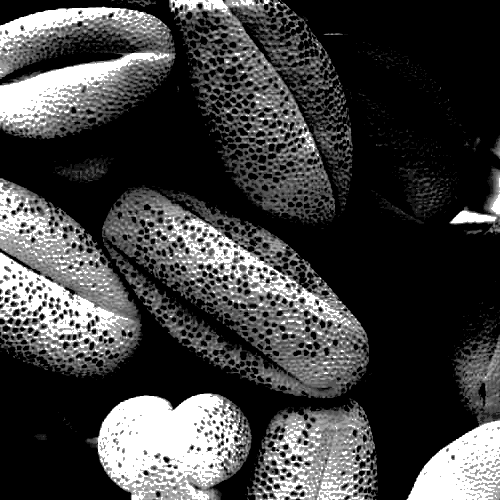

In [216]:
for i in range(len(grayArray)):
    for j in range(len(grayArray[0])):
        grayArray[i][j] = s[grayArray[i][j]]
print(grayArray)
Image.fromarray(grayArray)

In [218]:
resultant = [0]*256
for i in range(len(s)):
    index = s[i]
    resultant[index] += numPixels[i]


In [219]:
print(resultant)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18320, 0, 1750, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9441, 1642, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10381, 0, 0, 2945, 0, 0, 0, 0, 0, 6149, 1038, 0, 0, 0, 0, 4566, 961, 0, 0, 0, 4562, 0, 0, 2446, 0, 2641, 0, 0, 0, 0, 0, 5860, 0, 1861, 0, 0, 0, 3850, 0, 2016, 0, 0, 0, 0, 4290, 0, 0, 3081, 0, 0, 0, 0, 0, 6031, 0, 0, 2830, 0, 0, 0, 0, 4868, 0, 0, 0, 0, 0, 0, 7185, 0, 0, 0, 4197, 0, 0, 0, 3696, 0, 0, 0, 3911, 0, 0, 0, 0, 0, 0, 6814, 0, 1379, 0, 0, 0, 0, 0, 0, 7094, 1295, 0, 0, 0, 0, 0, 0, 6812, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9944, 0, 0, 2898, 0, 0, 0, 0, 0, 5615, 0, 0, 2791, 0, 0, 0, 0, 5118, 0, 0, 0, 3819, 0, 0, 3533, 0, 0, 0, 3482, 0, 0, 0, 0, 0, 5679, 0, 0, 0, 0, 0, 5933, 1008, 0, 0, 0, 0, 4599, 0, 2546, 0, 0, 0, 4007, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28659]


In [220]:
resultant = np.array(resultant)


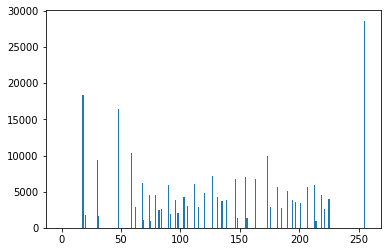

In [221]:
b = [x for x in range(256)]
plt.bar(b,resultant, width=1.0)
plt.show()